In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# data 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

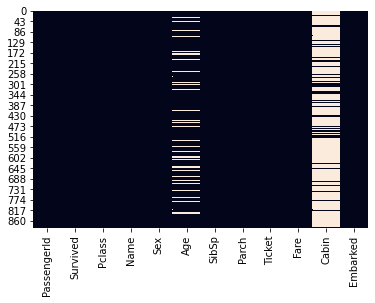

In [3]:
# data NA값 확인
df.isna().sum()
# Age 값, Embark값 NA 처리 필요,

# NA값 missing map 
sns.heatmap(df.isnull(), cbar = False)
# Carbin의 경우 티켓 자리를 의미하고 891개 데이터에서 77% 이상이 없는 데이터로 무시


In [4]:
import scipy.stats as stats

# Age 값 데이터 확인
print(df['Age'].describe())

# 데이터 정규화 함수
def normalized(arr):
    minValue = min(arr)
    maxValue = max(arr)
    result = list(map(lambda x: (x-minValue)/(maxValue-minValue), arr))    
    return result

def standardized(arr):
    m = arr.mean()
    st = arr.std()
    result = list(map(lambda x: (x-m)/st, arr))
    return result

# Age값 정규화
df['Age_n'] = normalized(df['Age'])
df['Age_s'] = standardized(df['Age'])
df.head()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_n,Age_s
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174,-0.530005
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.571430
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438,-0.254646
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.364911
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531,0.364911


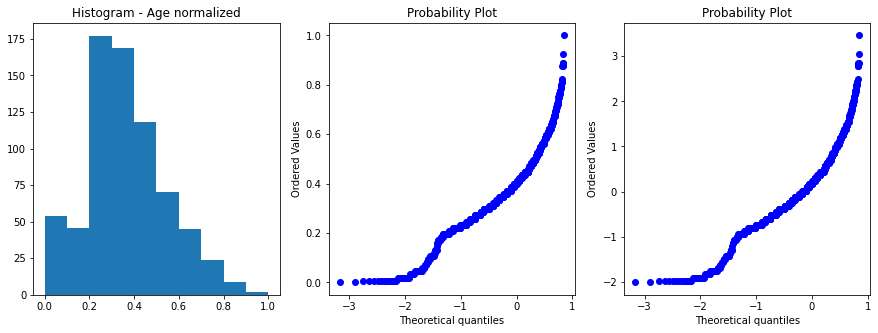

In [5]:
# Age 데이터 검증
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(df['Age_n'])
plt.title('Histogram - Age normalized')
plt.subplot(132)
stats.probplot(df['Age_n'], plot = plt)
plt.subplot(133)
stats.probplot(df['Age_s'], plot = plt)
plt.show()

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.head()
# NA 처리 결과 확인
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_n          177
Age_s          177
dtype: int64

In [7]:
# 성별에 따른 생존 여부 간략 확인
print(pd.crosstab(df.Sex, df.Survived, margins=False))

# 나이에 따른 Chile column 생성
df['Child'] = list(map(lambda x: 1 if x < 20 else 0, df['Age']))

# 나이, 성별에 따른 확률 테이블 생성
print(df.groupby(['Child','Sex'])['Survived'].agg(lambda x: sum(x)/len(x)))

Survived    0    1
Sex               
female     81  233
male      468  109
Child  Sex   
0      female    0.753138
       male      0.170082
1      female    0.706667
       male      0.292135
Name: Survived, dtype: float64


In [8]:
df[['Pclass', 'Fare']].describe()
# 위와 동일한 코드
# df.loc[:,['Pclass', 'Fare']].describe()
df['Fare2'] = list(map(lambda x: '30+' if x>30 else('20-30' if x>20 else('10-20' if x>10 else '10-')), df['Fare']))

print(df.groupby(['Fare2','Pclass','Sex'])['Survived'].agg(lambda x: sum(x)/len(x)))

Fare2  Pclass  Sex   
10-    1       male      0.000000
       2       male      0.000000
       3       female    0.593750
               male      0.111538
10-20  2       female    0.914286
               male      0.158730
       3       female    0.581395
               male      0.236842
20-30  1       female    0.857143
               male      0.441176
       2       female    0.903226
               male      0.160000
       3       female    0.333333
               male      0.125000
30+    1       female    0.977011
               male      0.365854
       2       female    1.000000
               male      0.214286
       3       female    0.125000
               male      0.240000
Name: Survived, dtype: float64


In [9]:
# dummification of sex, pclass 
df['Sex2'] = df['Sex'].map({'female':1, 'male':0})
df['FirstClass'] = df['Pclass'].apply(lambda x:1 if x==1 else 0)
df['SecondClass'] = df['Pclass'].apply(lambda x:1 if x==2 else 0)

In [10]:
# Create training and test dataset
from sklearn.model_selection import train_test_split
X = df[['Sex2','Child','FirstClass','SecondClass']]
y = df['Survived']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [11]:
# Input data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [12]:
import statsmodels.api as sm

# logit regression model with training data
model = sm.Logit(train_y, train_X)
results = model.fit(method = "newton") 
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.488423
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      619
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.2611
Time:                        10:34:14   Log-Likelihood:                -304.29
converged:                       True   LL-Null:                       -411.83
Covariance Type:            nonrobust   LLR p-value:                 2.311e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2769      0.109     11.691      0.000       1.063       1.491
x2             0.1529      0.

In [16]:
Pred_y = results.predict(test_X)
prediction = list(map(round, Pred_y))

from sklearn.metrics import confusion_matrix, accuracy_score
# confusion matrix
cm = confusion_matrix(test_y, prediction)
print("confusion matrix : \n",cm)

# accuracy score of model
print('test accuracy = ', accuracy_score(test_y, prediction))

confusion matrix : 
 [[117  42]
 [ 22  87]]
test accuracy =  0.7611940298507462
